<a href="https://colab.research.google.com/github/rhks13/Vision_practice/blob/main/mnist_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
# function을 위한 데이터셋
import torch.nn as nn
import torch.nn.functional as F
# 데이터 학습을 위한 모듈
import torchvision
import torchvision.datasets as vision_dsets
import torchvision.transforms as T
# 옵티마이저
import torch.optim as optim
#gradient, tensor를 인위적으로 만들기 위함
from torch.autograd import Variable
from torch.utils import data

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
def plot_confusion_matrix(cm, target_names=None, cmap = None, normalize = True, labels = True, title = 'Confusionmatrix'):
  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')
  if normalize:
    cm = cm.astype('float') / cm.sum(axis =1)[:, np.newaxis]

  plt.figure(figsize = (20,15))
  plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  thresh = cm.max()/ 1.5 if normalize else cm.max()/2

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)
  if labels:
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
        plt.text(j,i,"{:0.4f}".format(cm[i,j]),
                 horizontalalignment = 'center',
                 color="white" if cm[i,j] > thresh else "black")
      else:
        plt.text(j,i,"{:,}".format(cm[i,j]),
                 horizontalalignment = 'center',
                 color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel(" Predicted label |naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass))
  plt.show()

In [ ]:
def MNIST_DATA(root='./data', download = True, batch_size = 32, num_worker =1):
  
  # DATASET
  mnist_train = vision_dsets.MNIST(root = root,
                                  train = True, # train set 호출
                                   transform = T.ToTensor(),
                                   download = download)
  mnist_test = vision_dsets.MNIST(root = root,
                                  train = False, # test set 호출
                                   transform = T.ToTensor(),
                                   download = download)
  
  # DATA Loader
  trainDataLoader = data.DataLoader (dataset = mnist_train,
                                     batch_size = batch_size,
                                     shuffle = True,
                                     num_workers = num_worker) # 일반적으로는 1,4,8 과 같이 4의 배수를 넣음
  testDataLoader = data.DataLoader (dataset = mnist_train,
                                     batch_size = batch_size,
                                     shuffle = False,
                                     num_workers = num_worker)
  
  print("[+] Finished loading data & Preprocessing")
  return mnist_train, mnist_test, trainDataLoader, testDataLoader

In [ ]:
trainDset, testDset, trainDataLoader, testDataLoader = MNIST_DATA(batch_size = 32)

100%|██████████| 9912422/9912422 [00:00<00:00, 386934371.14it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 107485087.69it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 117204592.62it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19741480.59it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[+] Finished loading data & Preprocessing


In [ ]:
trainDset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
trainDset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
trainDset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
trainDset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
trainDset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
trainDset.data[0].shape

torch.Size([28, 28])

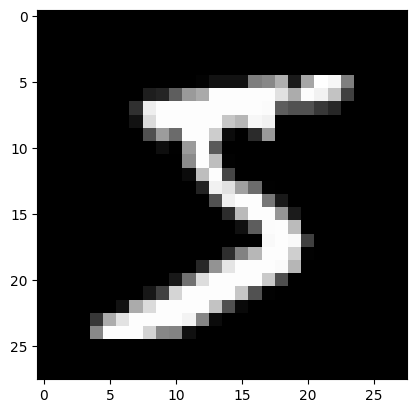

In [ ]:
plt.imshow(trainDset.data[0], cmap = 'gray')

# **Define Trainer**

In [ ]:
class Trainer():
  def __init__(self, trainloader, testloader, net, optimizer, criterion):
    self.trainloader = trainloader
    self.testloader = testloader
    self.net = net
    self.optimizer = optimizer
    self.criterion = criterion

  def train(self, epoch = 1):
    self.net.train() #or net.eval
    for e in range(epoch):
      running_loss = 0.0
      for i, data in enumerate(self.trainloader, 0):
        inputs, labels = data[0], data[1]
        inputs = inputs.cuda() # gpu training을 할거야 => 데이터를 cpu에서 gpu로 올려줘
        labels = labels.cuda()
        self.optimizer.zero_grad()

        outputs = self.net(inputs)
        loss = self.criterion(outputs, labels)
        loss.backward()
        self.optimizer.step()

        running_loss += loss.item()
        if(i+1) % 500 == 0.0:
          print('[%d, %5d] loss: %.3f' %(e+1, i+1, running_loss/500))
          running_loss = 0.0

  def test(self):
    self.net.eval()
    test_loss = 0
    correct = 0
    for inputs, labels in self.testloader:
      inputs = inputs.cuda()
      labels = labels.cuda()
      output = self.net(inputs) #size -> 32*10 (클래스의 개수만큼)
      pred = output.max(1, keepdim=True)[1] #size -> 32*1 (가장 높은 확률의 클래스만 남겨)
      correct += pred.eq(labels.view_as(pred)).sum().item() # 클래스와 라벨이 얼마나 같은지. 
      test_loss /= len(self.testloader.dataset) # 10,000
    print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.
          format(correct, len(self.testloader.dataset),
                 100.* correct/len(self.testloader.dataset)))    

  def get_conf(self):
    self.net.eval()
    confusion = torch.zeros(10,10)
    for inputs, labels in self.testloader:
      inputs = inputs.cuda()
      labels = labels.cuda()
      output = self.net(inputs)
      pred = torch.argmax(output, dim=1)

      for num in range(output.shape[0]):
        confusion[pred[num],labels[num]] +=1
    return confusion

### **(1) 2-Layer Network + sigmoid**


*   input : 28 * 28
*   hidden dimension : 30
*   output dimension : 10
*   activation : sigmoid
*   optimizer : SGD
*   loss : cross-entropy





In [ ]:
class MNIST_Net(nn.Module):
  def __init__(self):
    super(MNIST_Net, self).__init__()
    self.fc0 = nn.Linear(28*28,30)
    self.fc1 = nn.Linear(30,10)
    self.act = nn.Sigmoid()

  def forward(self,x):
    x = x.view(-1, 28*28) # flatten 과정 (batch_size, 28, 28) --> (batch_size, 28*28)
    x = self.fc0(x)
    x = self.act(x)
    x = self.fc1(x)
    return x
#softmax는 밑에 nn.CrossEntropy에서 알아서 태워줍니당

In [ ]:
mnist_net = MNIST_Net().cuda() #network를 생성한 다음 쿠다위로 올려줘
criterion = nn.CrossEntropyLoss() #criterion 지정
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001) #사용하고자 하는 optimizer 지정해줘 #SGD속에는 train해야하는 파라미터를 넣어줘야함

In [ ]:
trainer = Trainer(trainloader = trainDataLoader,
                  testloader = testDataLoader,
                  net = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [ ]:
trainer.train(epoch = 10)

[1,   500] loss: 2.332
[1,  1000] loss: 2.294
[1,  1500] loss: 2.279
[2,   500] loss: 2.253
[2,  1000] loss: 2.242
[2,  1500] loss: 2.229
[3,   500] loss: 2.207
[3,  1000] loss: 2.193
[3,  1500] loss: 2.179
[4,   500] loss: 2.152
[4,  1000] loss: 2.136
[4,  1500] loss: 2.121
[5,   500] loss: 2.087
[5,  1000] loss: 2.069
[5,  1500] loss: 2.050
[6,   500] loss: 2.009
[6,  1000] loss: 1.989
[6,  1500] loss: 1.963
[7,   500] loss: 1.921
[7,  1000] loss: 1.899
[7,  1500] loss: 1.869
[8,   500] loss: 1.823
[8,  1000] loss: 1.797
[8,  1500] loss: 1.769
[9,   500] loss: 1.719
[9,  1000] loss: 1.695
[9,  1500] loss: 1.672
[10,   500] loss: 1.625
[10,  1000] loss: 1.593
[10,  1500] loss: 1.570


In [ ]:
trainer.test()


Test set: Accuracy: 41636/60000 (69%)



### **(1) 2-Layer Network + ReLU**


*   input : 28 * 28
*   hidden dimension : 30
*   output dimension : 10
*   activation : sigmoid
*   optimizer : SGD
*   loss : cross-entropy










In [ ]:
class MNIST_Net(nn.Module):
  def __init__(self):
    super(MNIST_Net, self).__init__()
    self.fc0 = nn.Linear(28*28,30)
    self.fc1 = nn.Linear(30,10)
    self.act = nn.ReLU()

  def forward(self,x):
    x = x.view(-1, 28*28)
    x = self.fc0(x)
    x = self.act(x)
    x = self.fc1(x)
    return x

In [ ]:
mnist_net = MNIST_Net().cuda() #network를 생성한 다음 쿠다위로 올려줘
criterion = nn.CrossEntropyLoss() #criterion 지정
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001) #사용하고자 하는 optimizer 지정해줘 #SGD속에는 train해야하는 파라미터를 넣어줘야함

In [ ]:
trainer = Trainer(trainloader = trainDataLoader,
                  testloader = testDataLoader,
                  net = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [ ]:
trainer.train(epoch = 10)

[1,   500] loss: 2.275
[1,  1000] loss: 2.193
[1,  1500] loss: 2.076
[2,   500] loss: 1.835
[2,  1000] loss: 1.679
[2,  1500] loss: 1.527
[3,   500] loss: 1.275
[3,  1000] loss: 1.153
[3,  1500] loss: 1.050
[4,   500] loss: 0.920
[4,  1000] loss: 0.848
[4,  1500] loss: 0.814
[5,   500] loss: 0.737
[5,  1000] loss: 0.704
[5,  1500] loss: 0.672
[6,   500] loss: 0.629
[6,  1000] loss: 0.605
[6,  1500] loss: 0.604
[7,   500] loss: 0.557
[7,  1000] loss: 0.555
[7,  1500] loss: 0.538
[8,   500] loss: 0.512
[8,  1000] loss: 0.511
[8,  1500] loss: 0.508
[9,   500] loss: 0.487
[9,  1000] loss: 0.474
[9,  1500] loss: 0.470
[10,   500] loss: 0.461
[10,  1000] loss: 0.453
[10,  1500] loss: 0.446


In [ ]:
trainer.test()


Test set: Accuracy: 52935/60000 (88%)



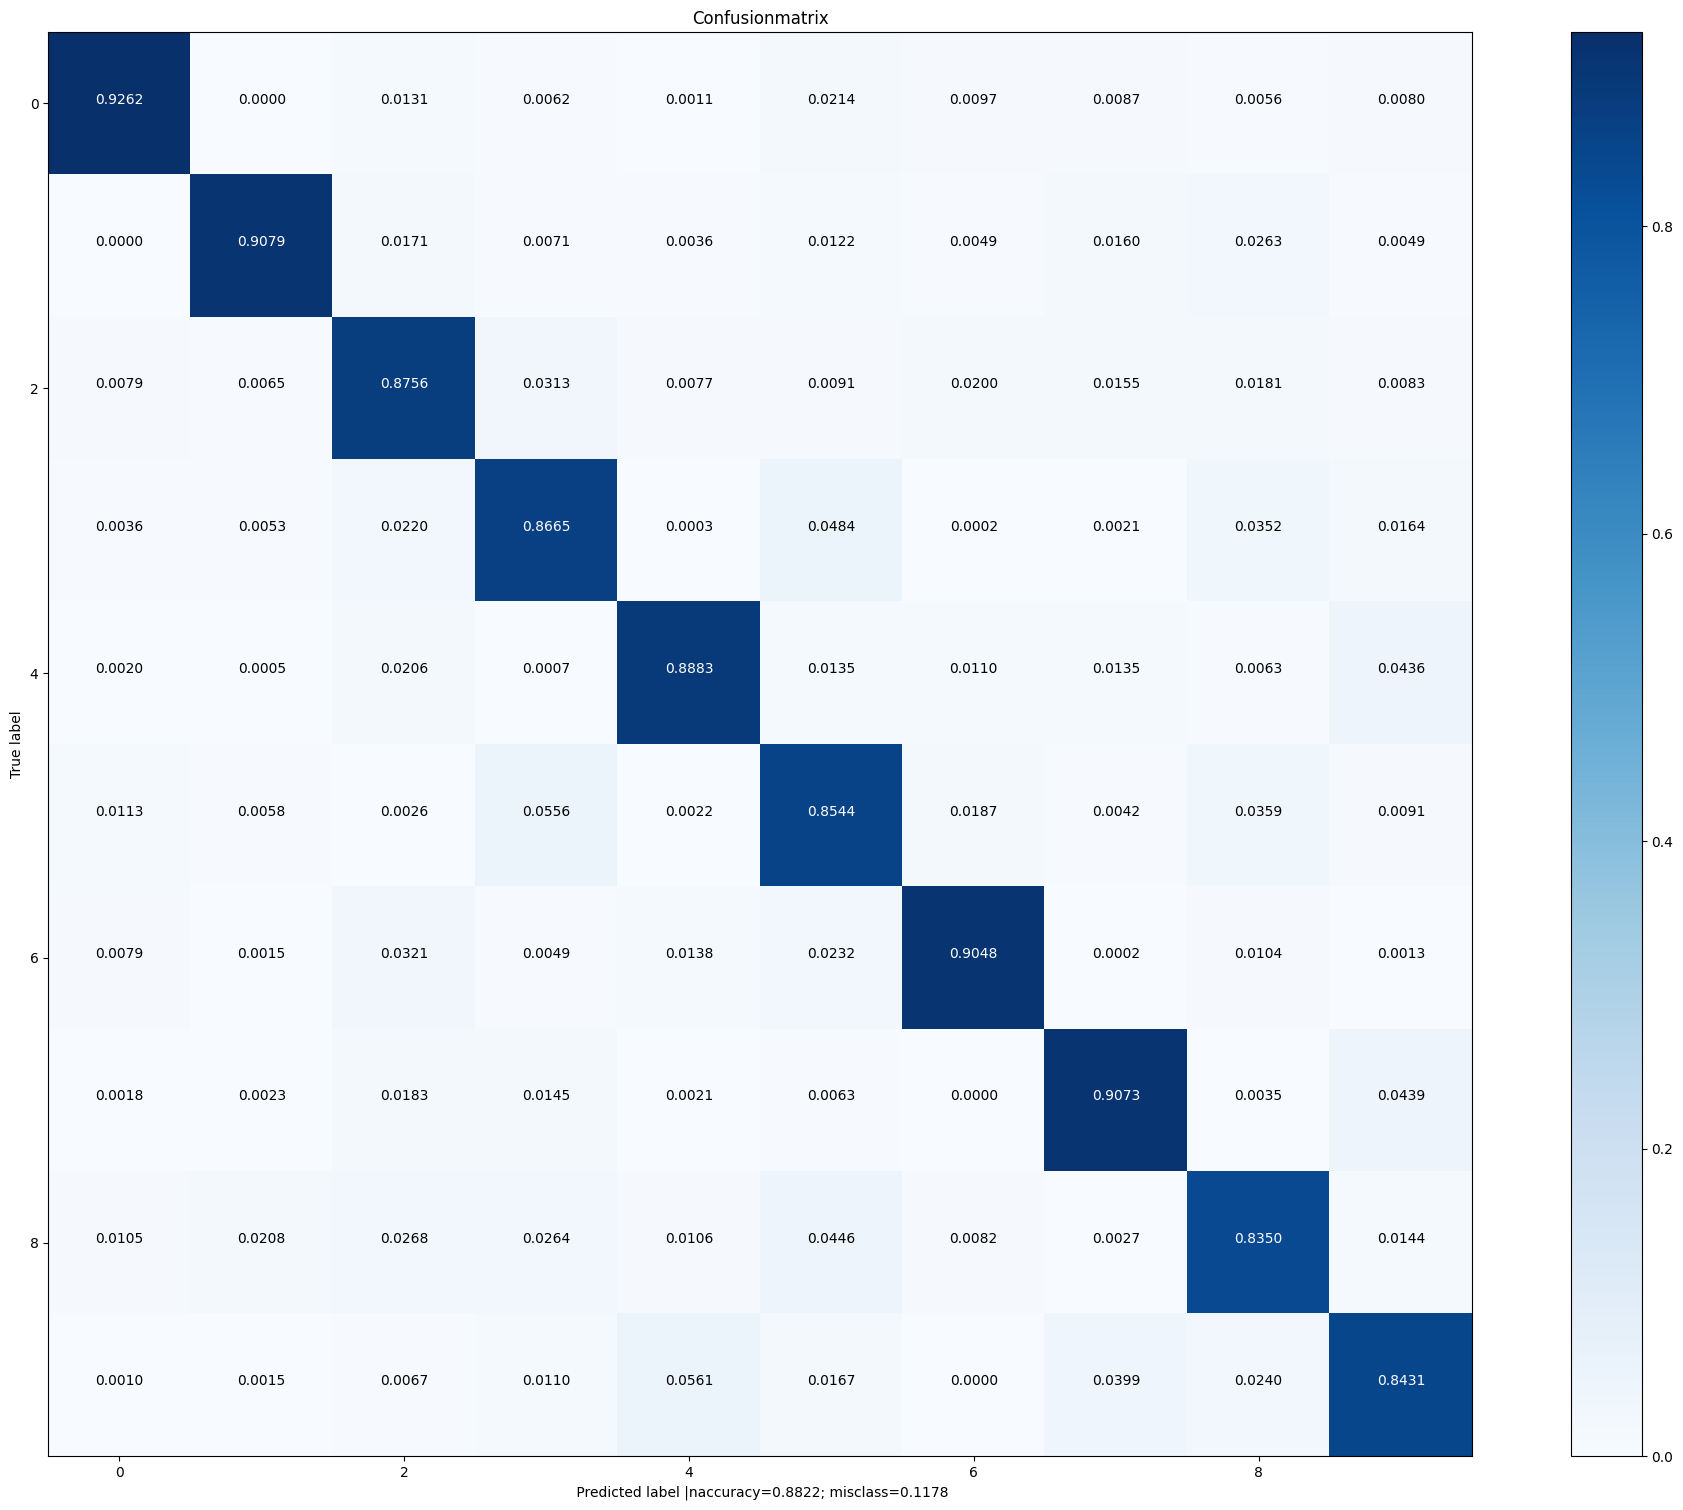

In [ ]:
plot_confusion_matrix(trainer.get_conf().numpy())

5,8,9 -> 여전히 잘 못맞추고 있어

왜 안좋을까?

confusionmat을 유의깊게 봐보자

추가적으로 노력할 수 있는 부분 많음
activation fucnt를 바꾸거나
30을 더 늘리거나
epoch을 더 늘리거나
layer 더 많이 쌓을 수 있음
learning rate 조정 

In [ ]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(mnist_net)

23860